Every business is looking for strategies to improve its profits. Data science professionals play a major role in providing the most accurate predictions for any given time. The data generated by a company is always handy for analyzing the future behaviour of target customers. By predicting future business trends, a business can make better decisions to improve its future performance.

I will try to  forecas business  where we will aim to predict the quarterly revenue of Adidas.



In [1]:
# Libraries

import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

In [2]:
data = pd.read_csv("adidas-quarterly-sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


The dataset contains two columns; Time Period and Revenue. The Time Period column contains the quarterly revenue of Adidas from 2000 to 2021, and the Revenue column contains the sales revenue in millions (euros). Let’s have a look at the quarterly sales revenue of Adidas:

<Figure size 640x480 with 0 Axes>

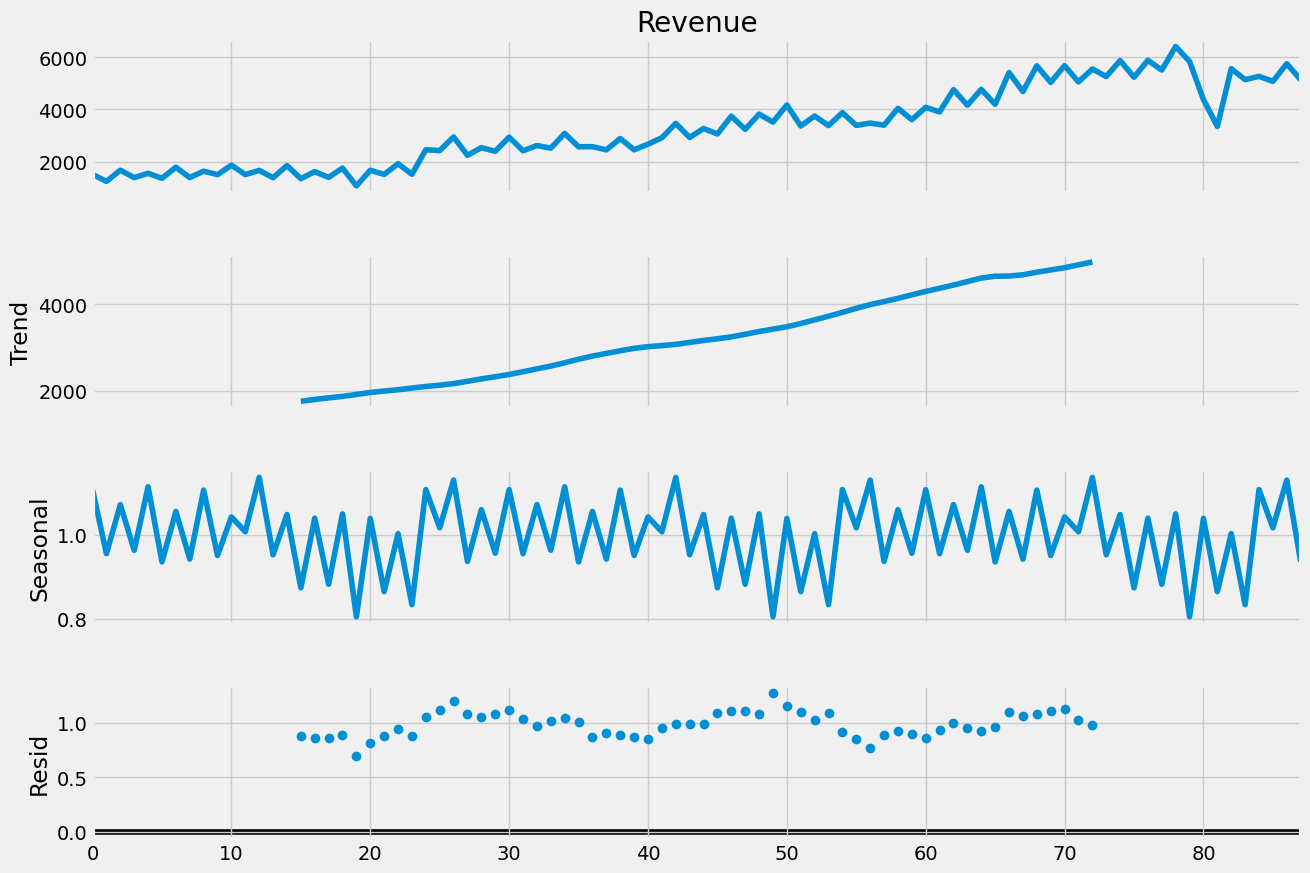

In [3]:
result = seasonal_decompose(data["Revenue"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

I will use the Seasonal ARIMA (SARIMA) model to forecast the quarterly sales revenue of Adidas. Before using the SARIMA model, it is necessary to find the p, d, and q values. 

As the data is not stationary, the value of d is 1. To find the values of p and q, we can use the autocorrelation and partial autocorrelation plots:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

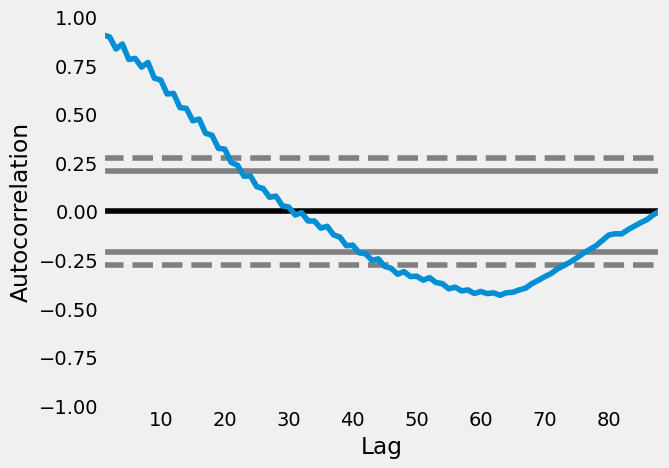

In [4]:
pd.plotting.autocorrelation_plot(data["Revenue"])

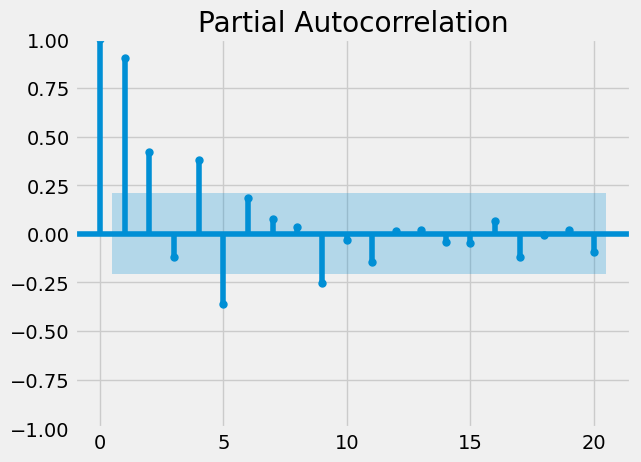

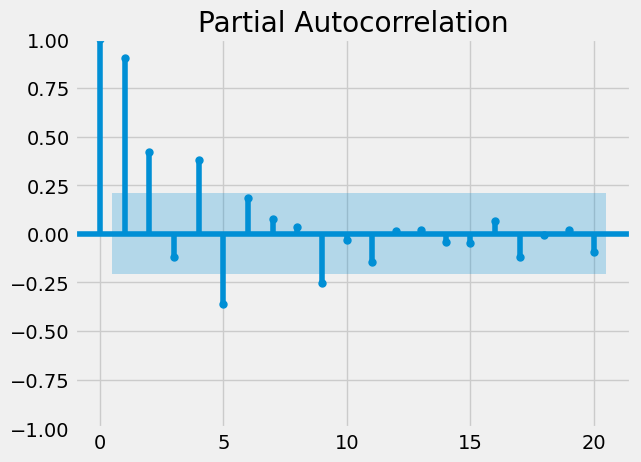

In [5]:
plot_pacf(data["Revenue"], lags = 20)

## Now here’s how to train a SARIMA model to predict the quarterly revenue of Adidas:

In [6]:
model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(5, 1, 2),
                                seasonal_order=(5, 1, 2, 12))
model=model.fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33485D+00    |proj g|=  1.93340D-01


 This problem is unconstrained.



At iterate    5    f=  6.25430D+00    |proj g|=  3.91119D-03

At iterate   10    f=  6.25345D+00    |proj g|=  6.93401D-03

At iterate   15    f=  6.25320D+00    |proj g|=  8.46354D-04

At iterate   20    f=  6.25286D+00    |proj g|=  5.54410D-03

At iterate   25    f=  6.25065D+00    |proj g|=  2.50231D-02

At iterate   30    f=  6.24288D+00    |proj g|=  2.52830D-02

At iterate   35    f=  6.23758D+00    |proj g|=  1.24347D-02

At iterate   40    f=  6.23441D+00    |proj g|=  1.46583D-02

At iterate   45    f=  6.23342D+00    |proj g|=  5.29333D-03

At iterate   50    f=  6.23319D+00    |proj g|=  2.20259D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.521
Date:                            Thu, 01 Aug 2024   AIC                           1127.041
Time:                                    15:24:06   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5792      0.388     -4.075      0.000      -2.339      -0.820
ar.L2         -1.4319      0.581   

### Now let’s forecast the quarterly revenue of Adidas for the next eight quarters:

In [7]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    6079.100161
89    5186.342005
90    6293.251085
91    5752.208835
92    5911.938384
93    5499.511492
94    6389.757197
95    5728.820538
Name: predicted_mean, dtype: float64


## Here’s how we can plot the predictions:

<Axes: >

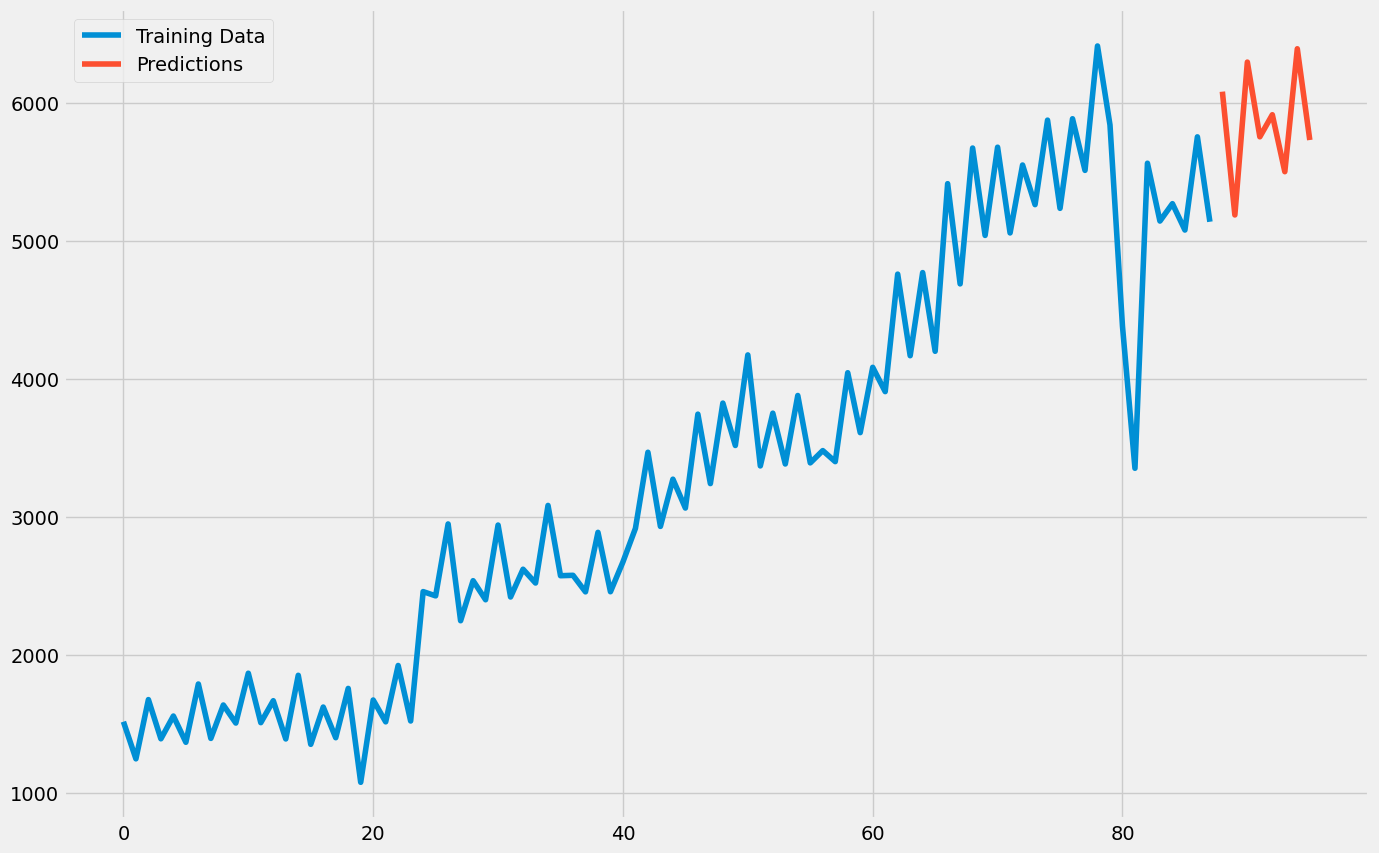

In [8]:
data["Revenue"].plot(legend=True, 
                     label="Training Data", 
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")